In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data
file_path = 'AB-Testing.csv'
data = pd.read_csv(file_path)

In [4]:
# Split data into A/B groups based on xyz_campaign_id
# Assuming xyz_campaign_id 916 as Group A and 936 as Group B
group_a = data[data['xyz_campaign_id'] == 916]
group_b = data[data['xyz_campaign_id'] == 936]


In [5]:
# Calculate Click-Through Rate (CTR) and Conversion Rate (CR) for each group
group_a['CTR'] = group_a['Clicks'] / group_a['Impressions']
group_a['CR'] = group_a['Approved_Conversion'] / group_a['Clicks'].replace(0, 1)

group_b['CTR'] = group_b['Clicks'] / group_b['Impressions']
group_b['CR'] = group_b['Approved_Conversion'] / group_b['Clicks'].replace(0, 1)

In [6]:
# Summary statistics
summary_a = group_a[['CTR', 'CR']].describe()
summary_b = group_b[['CTR', 'CR']].describe()

In [7]:
# Statistical t-tests to compare CTR and CR between Group A and Group B
ctr_ttest = stats.ttest_ind(group_a['CTR'], group_b['CTR'], equal_var=False)
cr_ttest = stats.ttest_ind(group_a['CR'], group_b['CR'], equal_var=False)

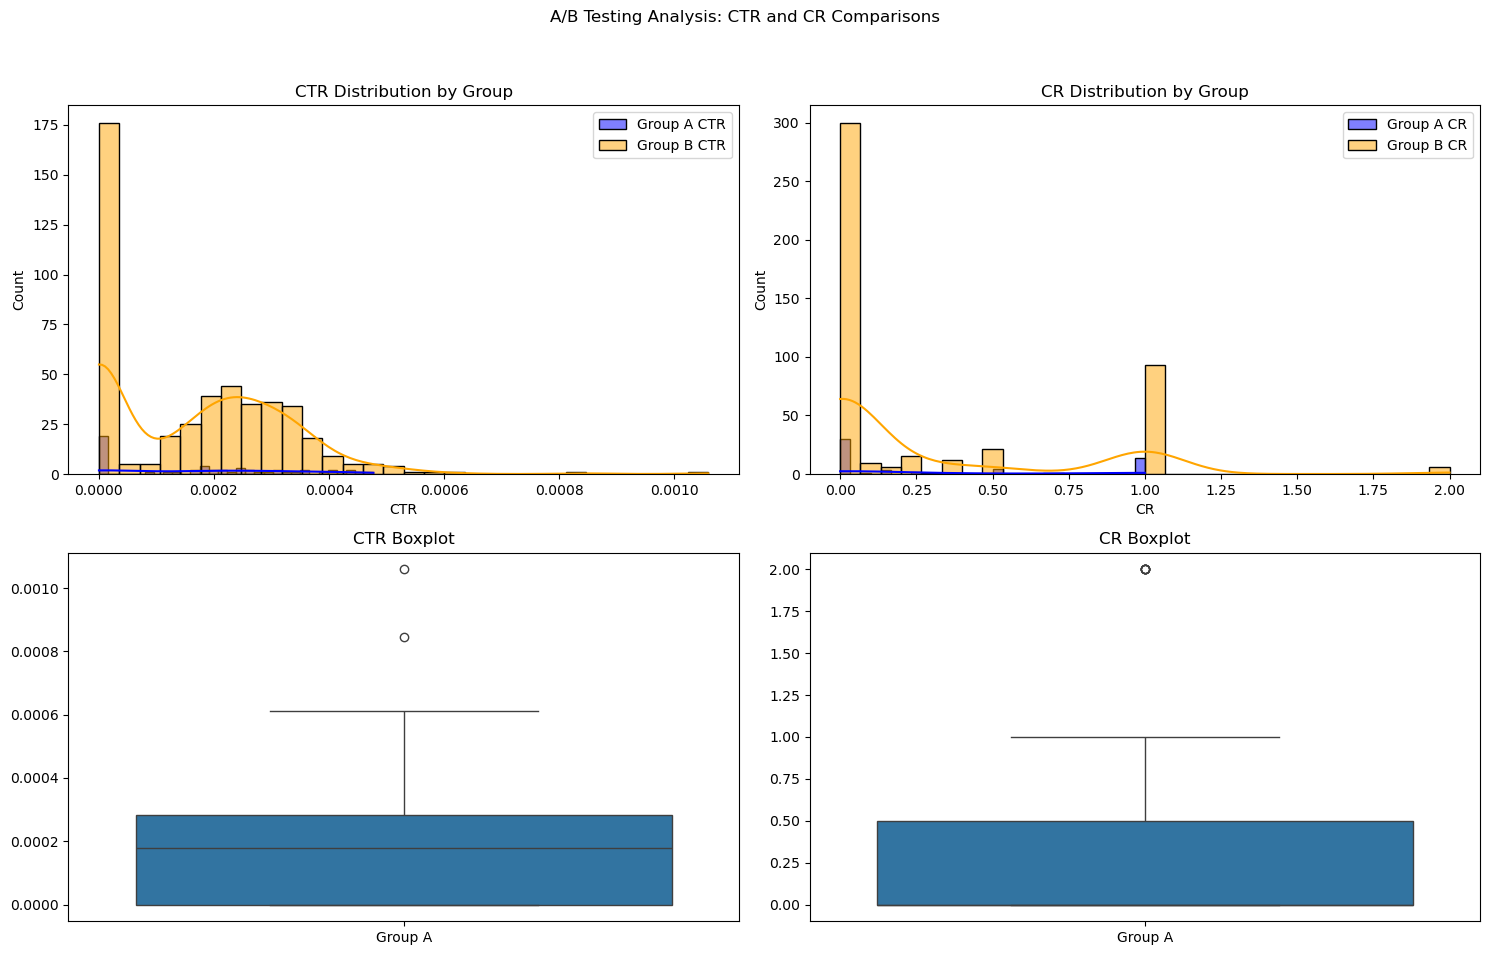

In [8]:
# Plotting the CTR and CR distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('A/B Testing Analysis: CTR and CR Comparisons')
# Plot CTR distributions
sns.histplot(group_a['CTR'], bins=30, kde=True, color='blue', ax=axes[0, 0], label='Group A CTR')
sns.histplot(group_b['CTR'], bins=30, kde=True, color='orange', ax=axes[0, 0], label='Group B CTR')
axes[0, 0].set_title('CTR Distribution by Group')
axes[0, 0].legend()

# Plot CR distributions
sns.histplot(group_a['CR'], bins=30, kde=True, color='blue', ax=axes[0, 1], label='Group A CR')
sns.histplot(group_b['CR'], bins=30, kde=True, color='orange', ax=axes[0, 1], label='Group B CR')
axes[0, 1].set_title('CR Distribution by Group')
axes[0, 1].legend()

# Boxplot CTR
sns.boxplot(data=[group_a['CTR'], group_b['CTR']], ax=axes[1, 0])
axes[1, 0].set_title('CTR Boxplot')
axes[1, 0].set_xticklabels(['Group A', 'Group B'])

# Boxplot CR
sns.boxplot(data=[group_a['CR'], group_b['CR']], ax=axes[1, 1])
axes[1, 1].set_title('CR Boxplot')
axes[1, 1].set_xticklabels(['Group A', 'Group B'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
# Print Summary Statistics and T-Test Results
print("Summary Statistics for Group A:")
print(summary_a)
print("\nSummary Statistics for Group B:")
print(summary_b)
print("\nCTR T-Test Result:", ctr_ttest)
print("CR T-Test Result:", cr_ttest)

Summary Statistics for Group A:
             CTR         CR
count  54.000000  54.000000
mean    0.000180   0.314815
std     0.000158   0.430872
min     0.000000   0.000000
25%     0.000000   0.000000
50%     0.000188   0.000000
75%     0.000310   0.875000
max     0.000477   1.000000

Summary Statistics for Group B:
              CTR          CR
count  464.000000  464.000000
mean     0.000165    0.271737
std      0.000157    0.443218
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000179    0.000000
75%      0.000282    0.500000
max      0.001059    2.000000

CTR T-Test Result: TtestResult(statistic=0.6654414066658976, pvalue=0.5080964498604723, df=65.73507863723364)
CR T-Test Result: TtestResult(statistic=0.6932473664294575, pvalue=0.49055988045412335, df=66.74115166799551)


## Recommendations to Improve Performance

### Enhance Targeting
- **Interest Categories**: Segmenting data by interest categories may reveal high-performing segments, allowing targeted ad efforts.
- **Age and Gender**: Analyzing age and gender impact on CTR and CR can help tailor ads to demographics with higher engagement.

### Optimize Ad Content
- Review the ad creative, message, and call-to-action to enhance engagement.
- A/B testing different versions of the ad text or images may yield better CTRs.

### Budget Allocation
- Focus spending on the segments with the highest performance. Adjust spending based on segment CTRs and CRs to maximize ROI.

### Landing Page Improvements
- Ensure the landing page resonates with ad messaging, as mismatched expectations can lower conversions.
- Use A/B testing on the landing page design to improve the conversion rate.

### Continuous Testing
- Regularly test variations of campaigns to find improvements in engagement.
